In [34]:
import numpy as np
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt

In [17]:
!ls data/raw

Baseline-agrocode-task1.ipynb	preds.csv  train.csv
example_csv_agrocode-task1.csv	test.csv


In [109]:
DATA_FOLDER = Path('data')
RAW_DATA_FOLDER = DATA_FOLDER / 'raw'
SUBMISSIONS_DATA_FOLDER = DATA_FOLDER / 'submissions'

train = pd.read_csv(RAW_DATA_FOLDER / 'train.csv')
test = pd.read_csv(RAW_DATA_FOLDER / 'test.csv')

In [19]:
train.head()

,Year,Field ID,Field Area,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,...,Day 358,Day 359,Day 360,Day 361,Day 362,Day 363,Day 364,Day 365,Day 366,Culture
0,2018,517,48.64,0.5369,0.5371,0.5375,0.5379,0.5384,0.5390,0.5397,...,0.4362,0.4322,0.4283,0.4243,0.4203,0.4163,0.4123,0.4084,NaN,4
1,2019,1395,80.41,0.1159,0.1096,0.1034,0.0971,0.0909,0.0846,0.0783,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
2,2017,44,43.64,-0.0204,-0.0207,-0.0210,-0.0212,-0.0215,-0.0218,-0.0220,...,0.0833,0.1149,0.1466,0.1782,0.2099,0.2415,0.2732,0.3048,NaN,2
3,2018,1591,79.34,0.4827,0.4576,0.4324,0.4073,0.3821,0.3570,0.3318,...,0.2657,0.2668,0.2680,0.2692,0.2705,0.2717,0.2730,0.2743,NaN,4
4,2017,681,144.76,-0.0202,-0.0191,-0.0181,-0.0170,-0.0160,-0.0150,-0.0140,...,-0.0354,-0.0358,-0.0361,-0.0365,-0.0369,-0.0372,-0.0376,-0.0379,NaN,4


In [20]:
train.tail()

,Year,Field ID,Field Area,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,...,Day 358,Day 359,Day 360,Day 361,Day 362,Day 363,Day 364,Day 365,Day 366,Culture
2833,2019,1631,117.04,0.4429,0.4430,0.4430,0.4431,0.4431,0.4431,0.4431,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
2834,2016,336,70.61,0.0620,0.0687,0.0755,0.0822,0.0890,0.0957,0.1025,...,0.0041,0.0173,0.0304,0.0436,0.0567,0.0699,0.0830,0.0962,0.1093,4
2835,2016,371,60.26,0.0460,0.0399,0.0338,0.0277,0.0216,0.0154,0.0093,...,0.3555,0.3506,0.3458,0.3409,0.3361,0.3313,0.3264,0.3216,0.3167,4
2836,2017,115,237.86,-0.0148,-0.0149,-0.0150,-0.0151,-0.0153,-0.0154,-0.0155,...,0.0362,0.0458,0.0555,0.0651,0.0747,0.0843,0.0939,0.1035,NaN,5
2837,2018,215,48.86,0.2593,0.2590,0.2589,0.2588,0.2589,0.2590,0.2592,...,0.1462,0.1510,0.1559,0.1607,0.1655,0.1703,0.1752,0.1800,NaN,7


In [21]:
train.shape

(2838, 370)

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Columns: 370 entries, Year to Culture
dtypes: float64(367), int64(3)
memory usage: 8.0 MB


In [23]:
train.describe()

,Year,Field ID,Field Area,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,...,Day 358,Day 359,Day 360,Day 361,Day 362,Day 363,Day 364,Day 365,Day 366,Culture
count,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,...,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,447.000000,2838.000000
mean,2017.259338,845.647639,106.608302,0.207495,0.205959,0.204435,0.202948,0.201810,0.200738,0.199660,...,0.198520,0.196360,0.191499,0.186658,0.181817,0.177668,0.173420,0.168890,0.088671,6.200141
std,1.255671,605.755332,72.944998,0.212510,0.211975,0.211715,0.211787,0.211938,0.212393,0.213124,...,0.195781,0.195195,0.192634,0.190466,0.188438,0.186766,0.185895,0.185588,0.126895,4.159082
min,2015.000000,1.000000,5.990000,-0.141800,-0.133400,-0.126600,-0.124800,-0.122200,-0.121200,-0.125400,...,-0.161000,-0.158000,-0.155000,-0.152000,-0.157700,-0.167000,-0.158600,-0.150200,-0.137000,1.000000
25%,2016.000000,255.250000,63.380000,0.010575,0.008750,0.007000,0.005225,0.003100,0.001000,-0.000275,...,0.004125,0.005000,0.007350,0.003575,0.000750,-0.000400,0.000025,-0.000575,-0.013150,4.000000
50%,2017.000000,743.500000,87.185000,0.154000,0.155200,0.151300,0.154100,0.155650,0.152600,0.154550,...,0.171250,0.166200,0.162750,0.161800,0.154350,0.136400,0.128000,0.116400,0.045100,4.000000
75%,2018.000000,1463.750000,124.370000,0.354550,0.356075,0.355750,0.353200,0.352825,0.348275,0.346275,...,0.323375,0.322400,0.314850,0.307875,0.301975,0.298375,0.295000,0.292425,0.192300,8.000000
max,2019.000000,1892.000000,560.730000,0.802900,0.803800,0.804700,0.805500,0.806400,0.807300,0.808100,...,0.817700,0.820100,0.823000,0.799100,0.799300,0.799500,0.799700,0.799800,0.516100,28.000000


In [24]:
train.columns

Index(['Year', 'Field ID', 'Field Area', 'Day 1', 'Day 2', 'Day 3', 'Day 4',
       'Day 5', 'Day 6', 'Day 7',
       ...
       'Day 358', 'Day 359', 'Day 360', 'Day 361', 'Day 362', 'Day 363',
       'Day 364', 'Day 365', 'Day 366', 'Culture'],
      dtype='object', length=370)

In [25]:
test.head()

,Year,Field ID,Field Area,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,...,Day 357,Day 358,Day 359,Day 360,Day 361,Day 362,Day 363,Day 364,Day 365,Day 366
0,2019,605,132.60,-0.0047,-0.0051,-0.0056,-0.0061,-0.0067,-0.0073,-0.0080,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,305,61.44,0.2445,0.2438,0.2431,0.2424,0.2417,0.2410,0.2403,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,1096,59.26,0.0145,0.0081,0.0018,-0.0046,-0.0110,-0.0122,-0.0133,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,179,112.36,-0.0171,-0.0200,-0.0209,-0.0216,-0.0221,-0.0223,-0.0221,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,282,68.57,0.3908,0.3892,0.3876,0.3859,0.3843,0.3827,0.3811,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
test.tail()

,Year,Field ID,Field Area,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,...,Day 357,Day 358,Day 359,Day 360,Day 361,Day 362,Day 363,Day 364,Day 365,Day 366
934,2019,665,46.50,-0.0176,-0.0179,-0.0181,-0.0184,-0.0186,-0.0188,-0.0189,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
935,2019,1277,229.24,0.0212,0.0181,0.0149,0.0118,0.0087,0.0056,0.0025,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
936,2019,875,166.97,0.0460,0.0411,0.0362,0.0312,0.0263,0.0214,0.0165,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,2019,301,123.52,0.2499,0.2483,0.2468,0.2452,0.2437,0.2422,0.2407,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,2019,464,88.15,0.3809,0.3599,0.3388,0.3178,0.2967,0.2757,0.2546,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 939 entries, 0 to 938
Columns: 369 entries, Year to Day 366
dtypes: float64(367), int64(2)
memory usage: 2.6 MB


In [29]:
test.describe()

,Year,Field ID,Field Area,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,...,Day 357,Day 358,Day 359,Day 360,Day 361,Day 362,Day 363,Day 364,Day 365,Day 366
count,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,...,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.0
mean,2018.990415,614.739084,109.074888,0.121286,0.117349,0.113949,0.110554,0.107156,0.103987,0.100897,...,0.23260,0.229120,0.225620,0.222100,0.218580,0.215060,0.211480,0.207920,0.204380,NaN
std,0.156296,448.125897,72.584004,0.169712,0.168228,0.166490,0.164941,0.163605,0.162295,0.161131,...,0.18688,0.182076,0.177405,0.172919,0.168577,0.164391,0.160452,0.156685,0.153139,NaN
min,2015.000000,1.000000,13.010000,-0.125400,-0.121900,-0.122500,-0.125000,-0.127400,-0.129800,-0.132300,...,-0.03470,-0.032000,-0.029300,-0.026700,-0.024000,-0.021300,-0.018700,-0.016000,-0.013300,NaN
25%,2019.000000,215.500000,61.310000,-0.012100,-0.013150,-0.013000,-0.013650,-0.014550,-0.015100,-0.016050,...,0.12620,0.123700,0.121200,0.118800,0.116300,0.113900,0.111400,0.108900,0.106500,NaN
50%,2019.000000,549.000000,91.260000,0.051300,0.046700,0.043800,0.040500,0.035200,0.032100,0.028500,...,0.27790,0.277900,0.277900,0.277800,0.277800,0.277800,0.277700,0.277700,0.277700,NaN
75%,2019.000000,978.000000,135.300000,0.235950,0.230400,0.225250,0.218650,0.215800,0.211450,0.209400,...,0.37500,0.373100,0.371200,0.369200,0.355700,0.340000,0.324300,0.308600,0.292900,NaN
max,2019.000000,1875.000000,662.000000,0.802800,0.801100,0.799400,0.797700,0.796000,0.794400,0.792700,...,0.41860,0.402900,0.387100,0.371400,0.367100,0.364900,0.362700,0.360400,0.358100,NaN


# Baseline - оборвать данные по минимальному количеству в тесте, только на таком количестве дней обучиться на трэине и посмотреть что получается


In [32]:
nan_amount_test = test.isnull().sum(axis=1)
max_nan_test = nan_amount_test.max()

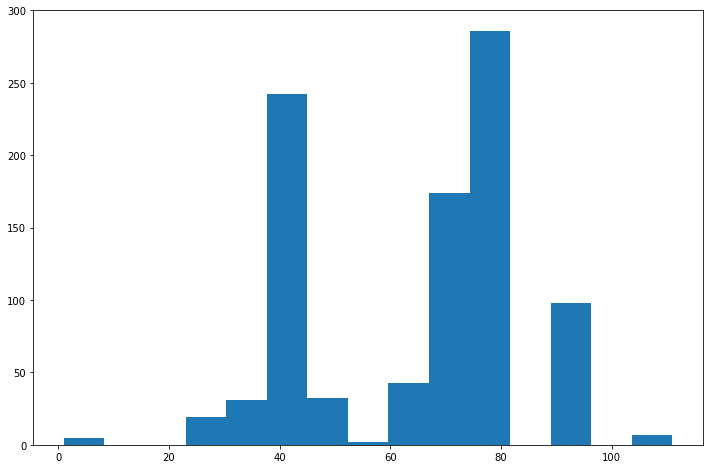

In [38]:
plt.figure(figsize=(12, 8))
plt.hist(nan_amount_test, bins=15)
plt.show()

### Идея для feature constuction

### Добавить категорию с ближайшим пиком (только подумать как к трэину применить)

## Пройдусь по фичам

In [42]:
train.columns

Index(['Year', 'Field ID', 'Field Area', 'Day 1', 'Day 2', 'Day 3', 'Day 4',
       'Day 5', 'Day 6', 'Day 7',
       ...
       'Day 358', 'Day 359', 'Day 360', 'Day 361', 'Day 362', 'Day 363',
       'Day 364', 'Day 365', 'Day 366', 'Culture'],
      dtype='object', length=370)

In [41]:
train['Year'].value_counts()

2018    925
2017    643
2019    476
2016    447
2015    347
Name: Year, dtype: int64

### Сделать категориальную one-hot или сохранить же последовательную информацию о году?

In [43]:
test['Year'].value_counts()

2019    934
2018      3
2017      1
2015      1
Name: Year, dtype: int64

### В тесте почти все 2019 года, выбросить остальные года или оставить???

In [44]:
train['Field ID'].nunique()

1524

In [45]:
test['Field ID'].nunique()

874

In [46]:
test['Field ID'][test['Field ID'].isin(train['Field ID'])]

1      305
3      179
4      282
5      881
7      149
      ... 
929    862
933    142
934    665
936    875
937    301
Name: Field ID, Length: 570, dtype: int64

### 2/3 теста известны, остальные нет))

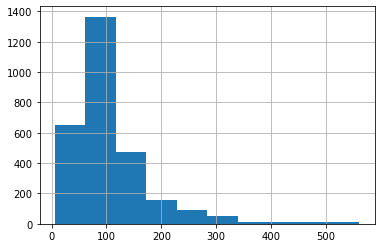

In [48]:
train['Field Area'].hist()

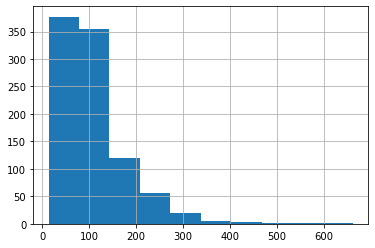

In [49]:
test['Field Area'].hist()

### Оставлю только 2019 год

In [51]:
train_2019 = train[train['Year'] == 2019]

In [56]:
train_2019.head()

,Year,Field ID,Field Area,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,...,Day 358,Day 359,Day 360,Day 361,Day 362,Day 363,Day 364,Day 365,Day 366,Culture
1,2019,1395,80.41,0.1159,0.1096,0.1034,0.0971,0.0909,0.0846,0.0783,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
13,2019,1184,226.81,-0.0104,-0.0108,-0.0112,-0.0116,-0.0120,-0.0124,-0.0128,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
14,2019,622,102.09,-0.0295,-0.0294,-0.0293,-0.0290,-0.0287,-0.0284,-0.0280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
19,2019,1347,108.75,-0.0530,-0.0526,-0.0522,-0.0518,-0.0514,-0.0510,-0.0506,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
22,2019,1872,83.83,0.0797,0.0742,0.0688,0.0633,0.0579,0.0524,0.0470,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5


In [74]:
no_nan_columns_amount = 4+max_nan_test
train_X = train_2019.iloc[:, :no_nan_columns_amount]
test_X = test.iloc[:, :no_nan_columns_amount]

In [75]:
train_X.isna().any().any()

False

In [76]:
test_X.isna().any().any()

False

In [77]:
# drop year because it is almost constant, field id needs investigation
cols_to_drop = ['Year', 'Field ID']
train_X = train_X.drop(columns=cols_to_drop)
test_X = test_X.drop(columns=cols_to_drop)

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import f1_score


X_train, X_val, y_train, y_val = train_test_split(train_X, train_2019.loc[:, 'Culture'], random_state=2324, train_size=0.8)

std_scaler = StandardScaler()
train_scaled = std_scaler.fit_transform(X_train)
val_scaled = std_scaler.transform(X_val)

ridge = RidgeClassifier(alpha=0.01, random_state=2324)
ridge.fit(train_scaled, y_train)
preds = ridge.predict(val_scaled)
print(f1_score(y_val, preds, average='weighted'))

0.5659259259259258


In [103]:
test_scaled = std_scaler.transform(test_X)
test_preds = ridge.predict(test_scaled)

In [105]:
csv = pd.read_csv(RAW_DATA_FOLDER / 'example_csv_agrocode-task1.csv')

In [107]:
csv

,Culture
0,0
1,0
2,0
3,0
4,0
...,...
934,0
935,0
936,0
937,0


In [127]:
pd.DataFrame(test_preds, columns=['Culture']).to_csv(SUBMISSIONS_DATA_FOLDER / 'subm_1.csv', index=False)